In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Reading the File

In [2]:
match_data = pd.read_csv('Match Data.csv',index_col=0)

In [3]:
match_data.head()

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,RESULT,WINNER,WIN_BY_RUNS,TOSS_WINNER_MODEL,WINNER_MODEL,TOSS_DECISION_MODEL,CITY_MODEL,TEAM1_WIN_RATE,TEAM2_WIN_RATE
0,60,2008,Bangalore,RCB,KKR,1,RCB,0,RCB,field,normal,KKR,140,0,1,0,0,0.0,0.0
1,61,2008,Chandigarh,KXIP,CSK,1,KXIP,0,CSK,bat,normal,CSK,33,1,1,1,0,0.0,0.0
2,62,2008,Delhi,DD,DD,1,RR,0,RR,bat,normal,DD,0,0,1,1,1,0.0,0.0
3,63,2008,Mumbai,MI,RCB,1,MI,0,MI,bat,normal,RCB,0,0,1,1,0,0.0,0.0
4,64,2008,Kolkata,KKR,KKR,1,SRH,0,SRH,bat,normal,KKR,0,0,1,1,1,1.0,0.0


# Label Encoding

<dl>
  <dt>TEAM1_MODEL and TEAM2_MODEL</dt>
      <dd>- Team 1 = 1</dd>
      <dd>- Team 2 = 0</dd>
  <dt>TOSS_WINNER_MODEL</dt>
      <dd>- Team 1 Toss Win = 1</dd>
      <dd>- Team 2 Toss Win = 0</dd>
  <dt>WINNER_MODEL</dt>
      <dd>- Team 1 Winner = 1</dd>
      <dd>- Team 2 Winner = 0</dd>
  <dt>CITY_MODEL</dt>
      <dd>- Team 1 Venue = 1</dd>
      <dd>- Team 2 Venue = 0</dd>
      <dd>- Outside Venue = 2</dd>
  <dt>TOSS_DECISION_MODEL</dt>
      <dd>- Field = 1</dd>
      <dd>- Bat = 0 </dd>
</dl>

# Win Rate 

Explanantion

before a team has won a match the win rate will remain zero

if the team has already won a match the the win_rate of previous matches will be calculated and the present match result won't affect

because we are adding the current result only in the succeeding rows so the calulation will always consider previous matches only.


In [4]:
def update_win_rate(dataframe):
    #creating two new columns and setting them to 0 by default
    null_values = []
    for i in range(len(dataframe)):
        null_values.append(0)
    dataframe['TEAM1_WIN_RATE'] = null_values
    dataframe['TEAM2_WIN_RATE'] = null_values


    #initialising the number of matches played by each team to 0
    total_match_team_wise = {'KKR':0,'CSK':0,'RCB':0,'KXIP':0,'DD':0,'SRH':0,'RPS':0,'GL':0,'KTK':0,'RR':0,'MI':0}

    total_matches = 0;
    match_wins_team_wise = {'KKR':0,'CSK':0,'RCB':0,'KXIP':0,'DD':0,'SRH':0,'RPS':0,'GL':0,'KTK':0,'RR':0,'MI':0}#initializing the number of matches won by each team to zero
    years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    for k in range(len(dataframe)):
        if match_wins_team_wise[dataframe.loc[k,'TEAM1']] > 0: #we want win_rate of a team before a match so this condition is used so we start calculating winrate only after each team has won a match
            dataframe.loc[k,'TEAM1_WIN_RATE'] = match_wins_team_wise[dataframe.loc[k,'TEAM1']]/total_match_team_wise[dataframe.loc[k,'TEAM1']]
        if match_wins_team_wise[dataframe.loc[k,'TEAM2']] >0:#same as before
            dataframe.loc[k,'TEAM2_WIN_RATE'] = match_wins_team_wise[dataframe.loc[k,'TEAM2']]/total_match_team_wise[dataframe.loc[k,'TEAM2']]
        #increamenting the match wins,total matches of teams 
        match_wins_team_wise[dataframe.loc[k,'WINNER']] +=1
        total_match_team_wise[dataframe.loc[k,'TEAM1']]+=1;
        total_match_team_wise[dataframe.loc[k,'TEAM2']]+=1;
        
    return dataframe 


In [5]:
match_data_with_win_rate = update_win_rate(match_data)

In [6]:
match_data_with_win_rate.head()

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,RESULT,WINNER,WIN_BY_RUNS,TOSS_WINNER_MODEL,WINNER_MODEL,TOSS_DECISION_MODEL,CITY_MODEL,TEAM1_WIN_RATE,TEAM2_WIN_RATE
0,60,2008,Bangalore,RCB,KKR,1,RCB,0,RCB,field,normal,KKR,140,0,1,0,0,0.0,0.0
1,61,2008,Chandigarh,KXIP,CSK,1,KXIP,0,CSK,bat,normal,CSK,33,1,1,1,0,0.0,0.0
2,62,2008,Delhi,DD,DD,1,RR,0,RR,bat,normal,DD,0,0,1,1,1,0.0,0.0
3,63,2008,Mumbai,MI,RCB,1,MI,0,MI,bat,normal,RCB,0,0,1,1,0,0.0,0.0
4,64,2008,Kolkata,KKR,KKR,1,SRH,0,SRH,bat,normal,KKR,0,0,1,1,1,1.0,0.0


In [7]:
def convert_datatype(dataset):
    #Setting dtypes

    dataset["Batting Innings"] = dataset["Batting Innings"].astype(int)
    dataset["Not out"] = dataset["Not out"].astype(int)
    dataset["Runs"] = dataset["Runs"].astype(int)
    dataset["High Score"] = dataset["High Score"].astype(int)
    dataset["Batting Average"] = dataset["Batting Average"].astype(float)
    dataset["Balls Faced"] = dataset["Balls Faced"].astype(int)
    dataset["Batting SR"] = dataset["Batting SR"].astype(float)
    dataset["100's"] = dataset["100's"].astype(int)
    dataset["50's"] = dataset["50's"].astype(int)
    dataset["0's"] = dataset["0's"].astype(int)
    dataset["4s"] = dataset["4s"].astype(int)
    dataset["6s"] = dataset["6s"].astype(int)
    dataset["Bowling Innings"] = dataset["Bowling Innings"].astype(int)
    dataset["Overs"] = dataset["Overs"].astype(float)
    dataset["Maidens"] = dataset["Maidens"].astype(int)
    dataset["Bowling Runs"] = dataset["Bowling Runs"].astype(int)
    dataset["Wickets"] = dataset["Wickets"].astype(int)
    dataset["Bowling Average"] = dataset["Bowling Average"].astype(float)
    dataset["Bowling Economy"] = dataset["Bowling Economy"].astype(float)
    dataset["Bowling SR"] = dataset["Bowling SR"].astype(float)
    dataset["4W Haul"] = dataset["4W Haul"].astype(int)
    dataset["5W Haul"] = dataset["5W Haul"].astype(int)
    dataset["Year"] = dataset["Year"].astype(int)
    
    return dataset

# Reading all files

In [8]:
def read_player_data():
    path = r'C:\Users\khand\Desktop\IPL Predictions\data_version4'
    all_files = glob.glob(path + "/*.xlsx")
    columns=['Player', 'Matches', 'Batting Innings', 'Not out', 'Runs', 'High Score',
       'Batting Average', 'Balls Faced', 'Batting SR', "100's", "50's", "0's",
       '4s', '6s', 'Bowling Innings', 'Overs', 'Maidens', 'Bowling Runs',
       'Wickets', 'BBI', 'Bowling Average', 'Bowling Economy', 'Bowling SR',
       '4W Haul', '5W Haul', 'Catches', 'Stumpings']
    
    li = []

    for filename in all_files:
        df = pd.read_excel(filename, index_col=None, header=0, sheet_name="Sheet6")
        df.columns = columns
        df["Year"] = filename[-9: -5]                                      #Extracting Year from filename 
        df["Team"] = filename[-14: -10].strip('4\\')                     #Extracting Team Name from filename 
        df = df.replace('-','0')
        df['High Score'] = df['High Score'].astype('str').str.strip('*')
        df["Team"] = df["Team"].str.upper()
        li.append(df)

    all_years_player_performance = pd.concat(li, axis=0, ignore_index=True)
    all_years_player_performance.drop("BBI", axis=1, inplace=True) #BBI information is not needed
    all_years_player_performance = convert_datatype(all_years_player_performance)
    
    return all_years_player_performance

In [9]:
all_years_player_performance = read_player_data()

In [10]:
all_years_player_performance["Team"]

0       CSK
1       CSK
2       CSK
3       CSK
4       CSK
       ... 
2018    SRH
2019    SRH
2020    SRH
2021    SRH
2022    SRH
Name: Team, Length: 2023, dtype: object

In [11]:
all_years_player_performance["Not out"].dtype

dtype('int32')

In [12]:
all_years_player_performance["Bowling SR"].dtype

dtype('float64')

In [13]:
all_years_player_performance["Team"].unique()

array(['CSK', 'DC', 'DD', 'GL', 'KKR', 'KTK', 'KXIP', 'MI', 'PWI', 'RCB',
       'RPS', 'RR', 'SRH'], dtype=object)

In [14]:
all_years_player_performance

,Player,Matches,Batting Innings,Not out,Runs,High Score,Batting Average,Balls Faced,Batting SR,100's,...,Wickets,Bowling Average,Bowling Economy,Bowling SR,4W Haul,5W Haul,Catches,Stumpings,Year,Team
0,MEK Hussey,4,3,1,168,116,84.00,100,168.00,1,...,0,0.00,0.00,0.0,0,0,2,0,2008,CSK
1,M Ntini,9,2,1,11,11,11.00,18,61.11,0,...,7,34.57,6.91,30.0,1,0,1,0,2008,CSK
2,ML Hayden,4,4,1,189,81,63.00,131,144.27,0,...,0,0.00,0.00,0.0,0,0,0,0,2008,CSK
3,M Muralitharan,15,1,0,0,0,0.00,3,0.00,0,...,11,36.72,6.96,31.6,0,0,4,0,2008,CSK
4,MS Dhoni,16,14,4,414,65,41.40,310,133.54,0,...,0,0.00,0.00,0.0,0,0,6,0,2008,CSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,DJ Hooda,11,7,1,64,20,10.66,63,101.58,0,...,1,21.00,10.50,12.0,0,0,10,0,2019,SRH
2019,Basil Thampi,3,1,1,1,1,0.00,1,100.00,0,...,0,0.00,9.16,0.0,0,0,0,0,2019,SRH
2020,S Nadeem,3,0,0,0,0,0.00,0,0.00,0,...,2,45.00,10.00,27.0,0,0,0,0,2019,SRH
2021,RK Bhui,1,1,0,7,7,7.00,12,58.33,0,...,0,0.00,0.00,0.0,0,0,0,0,2019,SRH


# Calculate Player Strength (DREAM11 Formula)

In [15]:
def player_strength(df):
    """
    Calculates Player Batting, Bowling and Overall Strength with Dream 11 Formula divided by innings
    """

    df['Batting Strength'] = (df['Batting Innings'] != 0).astype(int)*\
    ((df['Runs']+df['4s']+2*df['6s']+8*df["50's"]+16*df["100's"]-2*df["0's"])//df['Batting Innings']\
    +(lambda a: (a<=50)*-6 +((a>50) & (a<=60))*-4 + ((a>60) & (a<=70))*-2)(df['Batting SR']))

    df['Bowling Strength'] = (df['Bowling Innings'] != 0).astype(int)*\
    ((25*df['Wickets']+8*df['Maidens']+8*df['4W Haul']+16*df['5W Haul'])/df['Bowling Innings']\
    +(lambda a: (a>=11)*-6 +((a>=10) & (a<11))*-4 + ((a>=9) & (a<10))*-2)(df['Bowling Economy'])\
    +(lambda a: (a<=4)*6 +((a>4) & (a<=5))*4 + ((a>5) & (a<=6))*2)(df['Bowling Economy']))
   
    df['Strength'] = (df['Batting Innings'] != 0).astype(int)*\
    (df['Runs']+25*df['Wickets']+8*df['Catches']+12*df['Stumpings']+df['4s']+2*df['6s']\
    +8*df["50's"]+16*df["100's"]+8*df['Maidens']+8*df['4W Haul']+16*df['5W Haul']-2*df["0's"]\
    +(lambda a: (a>=11)*-6 +((a>=10) & (a<11))*-4 + ((a>=9) & (a<10))*-2)(df['Bowling Economy'])*df['Bowling Innings']\
    +(lambda a: (a<=4)*6 +((a>4) & (a<=5))*4 + ((a>5) & (a<=6))*2)(df['Bowling Economy'])*df['Bowling Innings']\
    +(lambda a: (a<=50)*-6 +((a>50) & (a<=60))*-4 + ((a>60) & (a<=70))*-2)(df['Batting SR'])*df['Batting Innings'])/df['Batting Innings']+\
    (df['Batting Innings'] == 0).astype(int)*\
    (df['Runs']+25*df['Wickets']+8*df['Catches']+12*df['Stumpings']+df['4s']+2*df['6s']\
    +8*df["50's"]+16*df["100's"]+8*df['Maidens']+8*df['4W Haul']+16*df['5W Haul']-2*df["0's"]\
    +(lambda a: (a>=11)*-6 +((a>=10) & (a<11))*-4 + ((a>=9) & (a<10))*-2)(df['Bowling Economy'])*df['Bowling Innings']\
    +(lambda a: (a<=4)*6 +((a>4) & (a<=5))*4 + ((a>5) & (a<=6))*2)(df['Bowling Economy'])*df['Bowling Innings']\
    +(lambda a: (a<=50)*-6 +((a>50) & (a<=60))*-4 + ((a>60) & (a<=70))*-2)(df['Batting SR'])*df['Batting Innings'])

In [16]:
all_years_player_performance.columns

Index(['Player', 'Matches', 'Batting Innings', 'Not out', 'Runs', 'High Score',
       'Batting Average', 'Balls Faced', 'Batting SR', '100's', '50's', '0's',
       '4s', '6s', 'Bowling Innings', 'Overs', 'Maidens', 'Bowling Runs',
       'Wickets', 'Bowling Average', 'Bowling Economy', 'Bowling SR',
       '4W Haul', '5W Haul', 'Catches', 'Stumpings', 'Year', 'Team'],
      dtype='object')

In [17]:
#Run the desired functions
player_strength(all_years_player_performance)

In [18]:
all_years_player_performance

,Player,Matches,Batting Innings,Not out,Runs,High Score,Batting Average,Balls Faced,Batting SR,100's,...,Bowling SR,4W Haul,5W Haul,Catches,Stumpings,Year,Team,Batting Strength,Bowling Strength,Strength
0,MEK Hussey,4,3,1,168,116,84.00,100,168.00,1,...,0.0,0,0,2,0,2008,CSK,72.0,NaN,78.000000
1,M Ntini,9,2,1,11,11,11.00,18,61.11,0,...,30.0,1,0,1,0,2008,CSK,4.0,22.111111,108.000000
2,ML Hayden,4,4,1,189,81,63.00,131,144.27,0,...,0.0,0,0,0,0,2008,CSK,60.0,NaN,60.250000
3,M Muralitharan,15,1,0,0,0,0.00,3,0.00,0,...,31.6,0,0,4,0,2008,CSK,-8.0,18.333333,299.000000
4,MS Dhoni,16,14,4,414,65,41.40,310,133.54,0,...,0.0,0,0,6,0,2008,CSK,35.0,NaN,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,DJ Hooda,11,7,1,64,20,10.66,63,101.58,0,...,12.0,0,0,10,0,2019,SRH,9.0,8.500000,23.714286
2019,Basil Thampi,3,1,1,1,1,0.00,1,100.00,0,...,0.0,0,0,0,0,2019,SRH,1.0,-2.000000,-5.000000
2020,S Nadeem,3,0,0,0,0,0.00,0,0.00,0,...,27.0,0,0,0,0,2019,SRH,NaN,12.666667,NaN
2021,RK Bhui,1,1,0,7,7,7.00,12,58.33,0,...,0.0,0,0,0,0,2019,SRH,3.0,NaN,3.000000


In [19]:
all_years_player_performance.isna().sum()

Player                0
Matches               0
Batting Innings       0
Not out               0
Runs                  0
High Score            0
Batting Average       0
Balls Faced           0
Batting SR            0
100's                 0
50's                  0
0's                   0
4s                    0
6s                    0
Bowling Innings       0
Overs                 0
Maidens               0
Bowling Runs          0
Wickets               0
Bowling Average       0
Bowling Economy       0
Bowling SR            0
4W Haul               0
5W Haul               0
Catches               0
Stumpings             0
Year                  0
Team                  0
Batting Strength    186
Bowling Strength    682
Strength            186
dtype: int64

In [20]:
all_years_player_performance.fillna(0, inplace=True)

In [21]:
#Initializing the strength columns

all_years_player_performance["Strength For Model"] = 0
all_years_player_performance["Bat Strength For Model"] = 0
all_years_player_performance["Bowl Strength For Model"] = 0
all_years_player_performance["Cumul Strength For Model"] = 0

In [22]:
%%time
for a in all_years_player_performance.Player.unique():          #Iteration for Players
    
    #Series of years the player has played sorted in descending order
    b = all_years_player_performance[all_years_player_performance['Player']==a]['Year'].sort_values(ascending=False)
    
    #Mean strength of player over IPL
    c = all_years_player_performance[all_years_player_performance['Player']==a]['Strength'].mean()
    
    #Mean strength of player over IPL
    d = all_years_player_performance[all_years_player_performance['Player']==a]['Batting Strength'].mean()
    
    #Mean strength of player over IPL
    e = all_years_player_performance[all_years_player_performance['Player']==a]['Bowling Strength'].mean()
    
    
    for i in range(len(b)):                     #Iteration over the years
        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            all_years_player_performance.loc[b.index[i],'Strength For Model'] = all_years_player_performance.loc[b.index[i+1],'Strength']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            all_years_player_performance.loc[b.index[i],'Strength For Model'] = c

        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            all_years_player_performance.loc[b.index[i],'Bat Strength For Model'] = all_years_player_performance.loc[b.index[i+1],'Batting Strength']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            all_years_player_performance.loc[b.index[i],'Bat Strength For Model'] = d

        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            all_years_player_performance.loc[b.index[i],'Bowl Strength For Model'] = all_years_player_performance.loc[b.index[i+1],'Bowling Strength']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            all_years_player_performance.loc[b.index[i],'Bowl Strength For Model'] = e

            
        #Cumulative Strength over all years played
        if i < len(b)-1:
            all_years_player_performance.loc[b.index[i],'Cumul Strength For Model'] = all_years_player_performance.loc[b.index[i+1:], 'Strength'].mean()
        else:
            all_years_player_performance.loc[b.index[i],'Cumul Strength For Model'] = c

Wall time: 6.45 s


Text(0.5, 1.0, 'Scatter Plot of Actual Bowling Strength and\nBowling Model Strength')

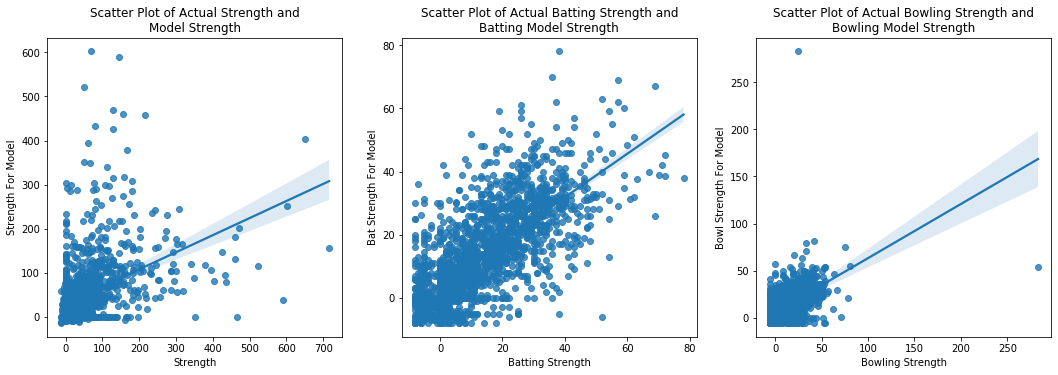

In [23]:
plt.figure(figsize=(18,5.5))
plt.subplot(131)
sns.regplot(x=all_years_player_performance['Strength'], y=all_years_player_performance['Strength For Model'])
plt.title('Scatter Plot of Actual Strength and\nModel Strength')
plt.subplot(132)
sns.regplot(x=all_years_player_performance['Batting Strength'], y=all_years_player_performance['Bat Strength For Model'])
plt.title('Scatter Plot of Actual Batting Strength and\nBatting Model Strength')
plt.subplot(133)
sns.regplot(x=all_years_player_performance['Bowling Strength'], y=all_years_player_performance['Bowl Strength For Model'])
plt.title('Scatter Plot of Actual Bowling Strength and\nBowling Model Strength')

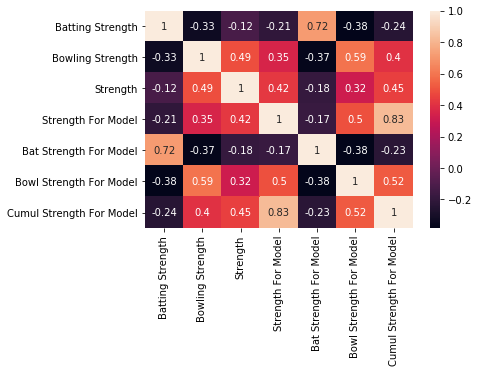

In [24]:
#Pearson Corrleation
ax = sns.heatmap(all_years_player_performance.loc[:,all_years_player_performance.columns[-8:]].corr(), annot=True)

In [25]:
new = all_years_player_performance.groupby(['Year','Team'])['Player','Strength','Team'].apply(lambda x: x.nlargest(11, columns=['Strength']))

C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [26]:
new

Player    Strength Team
Year Team                                       
2008 CSK  3      M Muralitharan  299.000000  CSK
          8            L Balaji  291.000000  CSK
          1             M Ntini  108.000000  CSK
          5             MS Gony  101.600000  CSK
          12    Joginder Sharma   78.333333  CSK
...                         ...         ...  ...
2019 SRH  2004      Rashid Khan   62.375000  SRH
          2016  Shakib Al Hasan   59.000000  SRH
          2006    Mohammad Nabi   56.142857  SRH
          2007        MK Pandey   42.727273  SRH
          2009       MJ Guptill   35.666667  SRH

[1100 rows x 3 columns]

In [27]:
new.to_csv('auction_data.csv')

In [28]:
all_years_player_performance.head(50)

,Player,Matches,Batting Innings,Not out,Runs,High Score,Batting Average,Balls Faced,Batting SR,100's,...,Stumpings,Year,Team,Batting Strength,Bowling Strength,Strength,Strength For Model,Bat Strength For Model,Bowl Strength For Model,Cumul Strength For Model
0,MEK Hussey,4,3,1,168,116,84.00,100,168.00,1,...,0,2008,CSK,72.0,0.000000,78.000000,42.143574,38.571429,0.000000,42.143574
1,M Ntini,9,2,1,11,11,11.00,18,61.11,0,...,0,2008,CSK,4.0,22.111111,108.000000,108.000000,4.000000,22.111111,108.000000
2,ML Hayden,4,4,1,189,81,63.00,131,144.27,0,...,0,2008,CSK,60.0,0.000000,60.250000,50.854167,48.333333,0.000000,50.854167
3,M Muralitharan,15,1,0,0,0,0.00,3,0.00,0,...,0,2008,CSK,-8.0,18.333333,299.000000,175.958333,-1.333333,23.186966,175.958333
4,MS Dhoni,16,14,4,414,65,41.40,310,133.54,0,...,0,2008,CSK,35.0,0.000000,39.000000,39.086678,31.166667,0.000000,39.086678
5,MS Gony,16,5,4,35,15,35.00,23,152.17,0,...,0,2008,CSK,8.0,28.062500,101.600000,45.561905,1.428571,14.565901,45.561905
6,SK Raina,16,14,3,421,55,38.27,295,142.71,0,...,0,2008,CSK,36.0,10.500000,44.071429,42.590155,34.333333,6.980655,42.590155
7,JA Morkel,13,10,3,241,71,34.42,163,147.85,0,...,0,2008,CSK,29.0,33.307692,75.200000,55.008301,18.444444,23.079162,55.008301
8,L Balaji,9,1,0,0,0,0.00,4,0.00,0,...,0,2008,CSK,-8.0,32.333333,291.000000,119.535714,-1.428571,28.156484,119.535714
9,S Badrinath,16,11,5,192,64,32.00,130,147.69,0,...,0,2008,CSK,22.0,0.000000,25.727273,26.852166,24.500000,0.000000,26.852166


In [29]:
team_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: a["Strength For Model"].sort_values(ascending=False)[:11].sum()/max(a["Matches"]))

cum_team_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: sum(a["Cumul Strength For Model"].sort_values(ascending=False)[:11])/max(a["Matches"]))

team_bat_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: a["Bat Strength For Model"].sort_values(ascending=False)[:11].sum()/max(a["Matches"]))

team_bowl_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: sum(a["Bowl Strength For Model"].sort_values(ascending=False)[:11])/max(a["Matches"]))

In [30]:
team_stren.head()

Team  Year
CSK   2008    45.967276
      2009    90.632052
      2010    66.767560
      2011    58.432674
      2012    78.590828
dtype: float64

In [31]:
TeamStrength = pd.concat([
                          team_stren,                          
                          team_bat_stren,
                          team_bowl_stren,
                          cum_team_stren], axis=1) 
TeamStrength.columns= [
                       'Team_Strength', 
                       'Batting_Team_Strength',
                       'Bowling_Team_Strength',
                       'Cumulative_Team_Strength']

TeamStrength.describe()

,Team_Strength,Batting_Team_Strength,Bowling_Team_Strength,Cumulative_Team_Strength
count,100.000000,100.000000,100.000000,100.000000
mean,55.307514,17.165134,16.542912,53.454443
std,13.943073,2.560715,3.743703,11.719942
min,32.440084,11.491228,9.742660,30.517034
25%,45.550276,15.424370,14.272620,45.840141
50%,53.107403,17.060897,15.959770,52.090165
75%,61.524555,18.469538,18.183457,60.325920
max,101.188988,24.428571,39.307236,90.632052


Text(0.5, 1.0, 'Scatter Plot of Team Strength and\nCumulative Team Strength')

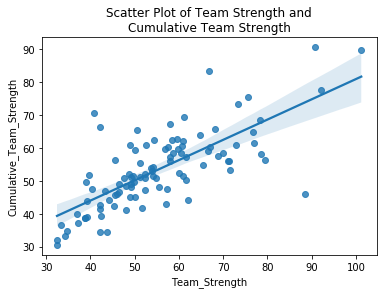

In [32]:
sns.regplot(x=TeamStrength.loc[:,'Team_Strength'], y=TeamStrength.loc[:,'Cumulative_Team_Strength'])
plt.title('Scatter Plot of Team Strength and\nCumulative Team Strength')

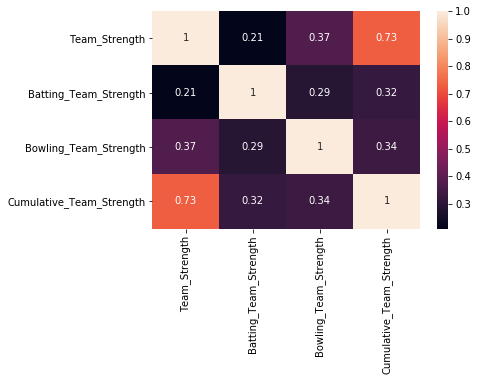

In [33]:
ax = sns.heatmap(TeamStrength.corr(), annot=True)

In [34]:
TeamStrength.head()

Team_Strength  Batting_Team_Strength  Bowling_Team_Strength  \
Team Year                                                                
CSK  2008      45.967276              17.146825              11.497391   
     2009      90.632052              21.192857              18.312296   
     2010      66.767560              17.410714              19.920292   
     2011      58.432674              14.083333              14.535135   
     2012      78.590828              15.984962              12.667610   

           Cumulative_Team_Strength  
Team Year                            
CSK  2008                 45.967276  
     2009                 90.632052  
     2010                 83.415104  
     2011                 62.508716  
     2012                 58.099739

In [35]:
TeamStrength.reset_index(inplace = True)

# Win Ratio Calculations(AHP)

In [36]:
Data = match_data.copy()

We are dropping KTK and GL Teams temporarily because these teams have not played against each other.

In [37]:
# Dropping teams who hasn't played against each other
Data.drop(Data[Data["TEAM1"] == "KTK"].index, inplace = True) 
Data.drop(Data[Data["TEAM2"] == "KTK"].index, inplace = True) 
Data.drop(Data[Data["TEAM1"] == "GL"].index, inplace = True) 
Data.drop(Data[Data["TEAM2"] == "GL"].index, inplace = True) 

In [38]:
#Creating Selector variable of form 'TEAMBig v/s TEAMSmall'
Data['Selector'] = ''
Data['Selector'][Data['TEAM1']>Data['TEAM2']] = Data['TEAM1'][Data['TEAM1']>Data['TEAM2']] + " v/s " + Data['TEAM2'][Data['TEAM1']>Data['TEAM2']]
Data['Selector'][Data['TEAM1']<Data['TEAM2']] = Data['TEAM2'][Data['TEAM1']<Data['TEAM2']] + " v/s " + Data['TEAM1'][Data['TEAM1']<Data['TEAM2']]

Data = Data[["Selector", "WINNER"]]

C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
#Applying groupby to find winner count
df = pd.DataFrame(Data.groupby('Selector').apply(lambda a: a['WINNER'].value_counts())).reset_index()

#Initializing Win Ratio Column
df['Win Ratio']=0

In [40]:
Data = Data[["Selector", "WINNER"]]
Data.head()

,Selector,WINNER
0,RCB v/s KKR,KKR
1,KXIP v/s CSK,CSK
2,RR v/s DD,DD
3,RCB v/s MI,RCB
4,SRH v/s KKR,KKR


In [41]:
#Applying groupby to find winner count
df = pd.DataFrame(Data.groupby('Selector').apply(lambda a: a['WINNER'].value_counts())).reset_index()

#Initializing Win Ratio Column
df['Win Ratio']=0
#df['AHP']=0

df.head()

,Selector,level_1,WINNER,Win Ratio
0,DD v/s CSK,CSK,15,0
1,DD v/s CSK,DD,6,0
2,KKR v/s CSK,CSK,13,0
3,KKR v/s CSK,KKR,7,0
4,KKR v/s DD,KKR,13,0


In [42]:
#Computing Win Ratio using WINNER feature
for i in range(0, 72, 2):
    df["Win Ratio"].iloc[i] = df["WINNER"].iloc[i]/df["WINNER"].iloc[i+1]
    df["Win Ratio"].iloc[i+1] = df["WINNER"].iloc[i+1]/df["WINNER"].iloc[i]

C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
df

,Selector,level_1,WINNER,Win Ratio
0,DD v/s CSK,CSK,15,2.500000
1,DD v/s CSK,DD,6,0.400000
2,KKR v/s CSK,CSK,13,1.857143
3,KKR v/s CSK,KKR,7,0.538462
4,KKR v/s DD,KKR,13,1.300000
...,...,...,...,...
67,SRH v/s RCB,RCB,11,0.785714
68,SRH v/s RPS,SRH,6,1.500000
69,SRH v/s RPS,RPS,4,0.666667
70,SRH v/s RR,RR,12,1.500000


# AHP Matrix For Team Weight Calculation

In [44]:
#Initializing Null Dataframe for pair-wise weight matrix 
Teams = df.level_1.unique()
init_df = pd.DataFrame([], index = Teams, columns = Teams)

#Assigning pair-wise weights using win ratio
for i in range(0,init_df.shape[0]):               #Iteration over rows in init_df
    for j in range(0,init_df.shape[0]):           #Iteration over columns in init_df
        
        if i == j:                                #Enters if element is diagonal
            init_df.iloc[i,j] = 1
    
        elif i != j:                              #Enters if element is non-diagonal
            #Creating Selector variable for given pair
            if init_df.columns[j]>init_df.index[i]: 
                a = init_df.columns[j]+" v/s "+init_df.index[i]
            if init_df.columns[j]<init_df.index[i]:
                a = init_df.index[i]+" v/s "+init_df.columns[j]
            
            #Assigns Win Ratio(column index 3) as pair-wise weight 
            init_df.iloc[i,j] = \
            df[(df['Selector'] == a) & (df['level_1'] == init_df.index[i])].iloc[0,3]

init_df

,CSK,DD,KKR,KXIP,MI,RCB,RPS,RR,SRH
CSK,1,2.5,1.85714,1.33333,0.6875,2.14286,2,2,2.14286
DD,0.4,1,0.769231,0.642857,1,0.571429,1.25,0.727273,1
KKR,0.538462,1.3,1,2.125,0.315789,1.4,3.5,1,1.88889
KXIP,0.75,1.55556,0.470588,1,0.846154,1,1,0.9,0.846154
MI,1.45455,1,3.16667,1.18182,1,1.77778,1.4,1,1.18182
RCB,0.466667,1.75,0.714286,1,0.5625,1,3.5,0.7,0.785714
RPS,0.5,0.8,0.285714,1,0.714286,0.285714,1,0.25,0.666667
RR,0.5,1.375,1,1.11111,1,1.42857,4,1,1.5
SRH,0.466667,1,0.529412,1.18182,0.846154,1.27273,1.5,0.666667,1


In [45]:
def AHP(df,random_index):
    """Reads Dataframe of numerical pair-wise order columns & random index and
    returns an array of criteria weights if consistency ratio i.e. CR<0.1 is satisfied."""

    matrix=np.mat(df)         #Conveting df to numpy matrix
        
    n=matrix.shape[0]              #Extracting matrix size
    
    if n != matrix.shape[1]:       #Dimension check
        print('Input matrix is not square.\Please verify the matrix dimensions.')
    elif np.multiply(matrix.T,matrix).round(decimals=5).sum()%1 != 0:       #Trnspose elements inverse check
        print('Transpose elements are not reciprocal.\nPlease verify the weights.')
    else:                          #Enters AHP algorithm
        #Pair-wise weight matrix divided column sums
        mat1 = np.divide(matrix, matrix.sum(axis=0))
        
        #Criteria weights computed by Row-wise mean of mat1
        criteria_weights = mat1.mean(axis=1)
        
        #Weighted sum computed by element wise multiplication of pair-wise matrix with criteria weight followed by
        #row-wise addition
        weighted_sum = np.multiply(matrix, criteria_weights.T).sum(axis=1)
        
        #lamda computed by averaging of ratio of weighted sum and criteria weights
        lambda_max = (weighted_sum/criteria_weights).mean()
    
        #CI & CR Calculation
        consistency_index = (lambda_max-n)/(n-1)
        consistency_ratio = consistency_index/random_index

        if consistency_ratio<0.1:
            print(f'Consistency Ratio {consistency_ratio:.4} satisfies CR < 0.1 condition')
            return criteria_weights
        else:
            print(f'Consistency Ratio {consistency_ratio:.4} does not satisfy CR < 0.1 condition')
            return None

In [46]:
weights = AHP(init_df.astype('float'), 1.45)

Consistency Ratio 0.04966 satisfies CR < 0.1 condition


In [47]:
weights

matrix([[0.16900712],
        [0.08076035],
        [0.12745465],
        [0.09380131],
        [0.15160852],
        [0.09982425],
        [0.06032793],
        [0.12695051],
        [0.09026536]])

In [48]:
Team_criteria_weights= pd.DataFrame(weights, index = init_df.index).sort_values(by=0)
Team_weights = Team_criteria_weights/Team_criteria_weights.median()
Team_weights

,0
RPS,0.604341
DD,0.809025
SRH,0.904243
KXIP,0.939665
RCB,1.000000
RR,1.271740
KKR,1.276790
MI,1.518754
CSK,1.693047


In [49]:
Team_priority_using_AHP = TeamStrength.iloc[:,[0,1]]
Team_priority_using_AHP.head()

,Team,Year
0,CSK,2008
1,CSK,2009
2,CSK,2010
3,CSK,2011
4,CSK,2012


In [50]:
for team in Team_weights.index:
    
    i = Team_priority_using_AHP[Team_priority_using_AHP['Team']==team].index
    Team_priority_using_AHP.loc[i,'AHP'] = Team_weights.loc[team,0]

C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [51]:
Team_priority_using_AHP=Team_priority_using_AHP.fillna(1)

In [52]:
Team_priority_using_AHP = Team_priority_using_AHP.round(5)

In [53]:
Team_priority_using_AHP['AHP'].unique()

array([1.69305, 1.     , 0.80903, 1.27679, 0.93966, 1.51875, 0.60434,
       1.27174, 0.90424])

In [54]:
dictw={1.69305:1, 0.80903:8, 1.:5, 1.27679:3, 0.93966:6,
       1.51875:2, 0.60434:9, 1.27174:4 , 0.90424:7 }

In [55]:
Team_priority_using_AHP.replace(dictw)

,Team,Year,AHP
0,CSK,2008,1.0
1,CSK,2009,1.0
2,CSK,2010,1.0
3,CSK,2011,1.0
4,CSK,2012,1.0
...,...,...,...
95,SRH,2015,7.0
96,SRH,2016,7.0
97,SRH,2017,7.0
98,SRH,2018,7.0


# Merge 

In [56]:
# Team_Points = pd.read_csv('team_points.csv')
# Team_Points.head()

match_data
TeamStrength
Team_priority_using_AHP

In [57]:
def feature_joiner(df1,df2):
    """Reads Dataframe containing match data (df1) & Dataframe containing Team Features (df2) and 
    returns df1 with additional features joined from df2
    
    df2 should be in this format:
    df2.columns = ['Team', 'Year', 'Feature_1', 'Feature_2', ....] 
    """
    
    new_columns = list('TEAM1_'+df2.columns[2:])+list('TEAM2_'+df2.columns[2:])   #Extracting names of new columns
    n_features = int(len(new_columns)/2)                                          #Number of new features for a given team    
    
    df1 = pd.concat([df1, pd.DataFrame(columns = new_columns)],sort=False)        #Adding new columns to the original dataframe
    
    for team in df2.iloc[:,0].unique():   #Iteration over teams
        for year in df2[df2.iloc[:,0] == team].iloc[:,1].unique():    #Iteration over seasons
            #Reading index of rows with team in TEAM1 column
            i = df1[(df1.loc[:,'TEAM1'] == team) & (df1.loc[:,'SEASON'] == year)].index
            #Assigning values
            df1.iloc[i, -n_features*2:-n_features] = df2[(df2.iloc[:,0] == team) & (df2.iloc[:,1] == year)].iloc[:,2:].values
            
            #Reading index of rows with team in TEAM2 column
            j = df1[(df1.loc[:,'TEAM2'] == team) & (df1.loc[:,'SEASON'] == year)].index
            #Assigning values
            df1.iloc[j, -n_features:] = df2[(df2.iloc[:,0] == team) & (df2.iloc[:,1] == year)].iloc[:,2:].values
        
    return df1

In [58]:
Data = feature_joiner(match_data, TeamStrength)
Data.head().T

,0,1,2,3,4
ID,60,61,62,63,64
SEASON,2008,2008,2008,2008,2008
CITY,Bangalore,Chandigarh,Delhi,Mumbai,Kolkata
CITY_Corrrected,RCB,KXIP,DD,MI,KKR
TEAM1,KKR,CSK,DD,RCB,KKR
TEAM1_MODEL,1,1,1,1,1
TEAM2,RCB,KXIP,RR,MI,SRH
TEAM2_MODEL,0,0,0,0,0
TOSS_WINNER,RCB,CSK,RR,MI,SRH
TOSS_DECISION,field,bat,bat,bat,bat


In [59]:
Data['TEAM1_WINxSTREN'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Team_Strength']
Data['TEAM1_WINxCUMSTREN'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Cumulative_Team_Strength']


#Data['TEAM1_WINxAHPMEAN'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Team AHP mean']
#Data['TEAM1_WINxAHPVAL'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Team AHP value']
#Data['TEAM1_WINxAHPMED'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Team AHP median']

Data['TEAM2_WINxSTREN'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Team_Strength']
Data['TEAM2_WINxCUMSTREN'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Cumulative_Team_Strength']
#Data['TEAM2_WINxAHPVAL'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Team AHP value']
#Data['TEAM2_WINxAHPMEAN'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Team AHP mean']
#Data['TEAM2_WINxAHPMED'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Team AHP median']

In [60]:
Data['TEAM1_CONSISTENCY'] = ((Data['TEAM1_Team_Strength'] * 0.8) + (Data['TEAM1_Cumulative_Team_Strength'] * 0.2)) / 2
Data['TEAM2_CONSISTENCY'] = ((Data['TEAM2_Team_Strength'] * 0.8) + (Data['TEAM2_Cumulative_Team_Strength'] * 0.2)) / 2

In [61]:
Data.columns

Index(['ID', 'SEASON', 'CITY', 'CITY_Corrrected', 'TEAM1', 'TEAM1_MODEL',
       'TEAM2', 'TEAM2_MODEL', 'TOSS_WINNER', 'TOSS_DECISION', 'RESULT',
       'WINNER', 'WIN_BY_RUNS', 'TOSS_WINNER_MODEL', 'WINNER_MODEL',
       'TOSS_DECISION_MODEL', 'CITY_MODEL', 'TEAM1_WIN_RATE', 'TEAM2_WIN_RATE',
       'TEAM1_Team_Strength', 'TEAM1_Batting_Team_Strength',
       'TEAM1_Bowling_Team_Strength', 'TEAM1_Cumulative_Team_Strength',
       'TEAM2_Team_Strength', 'TEAM2_Batting_Team_Strength',
       'TEAM2_Bowling_Team_Strength', 'TEAM2_Cumulative_Team_Strength',
       'TEAM1_WINxSTREN', 'TEAM1_WINxCUMSTREN', 'TEAM2_WINxSTREN',
       'TEAM2_WINxCUMSTREN', 'TEAM1_CONSISTENCY', 'TEAM2_CONSISTENCY'],
      dtype='object')

In [62]:
Data

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,...,TEAM2_Team_Strength,TEAM2_Batting_Team_Strength,TEAM2_Bowling_Team_Strength,TEAM2_Cumulative_Team_Strength,TEAM1_WINxSTREN,TEAM1_WINxCUMSTREN,TEAM2_WINxSTREN,TEAM2_WINxCUMSTREN,TEAM1_CONSISTENCY,TEAM2_CONSISTENCY
0,60.0,2008.0,Bangalore,RCB,KKR,1.0,RCB,0.0,RCB,field,...,38.8424,16.3418,12.7543,38.8424,0,0,0,0,27.0732,19.4212
1,61.0,2008.0,Chandigarh,KXIP,CSK,1.0,KXIP,0.0,CSK,bat,...,34.8023,17.8717,9.74266,34.8023,0,0,0,0,22.9836,17.4011
2,62.0,2008.0,Delhi,DD,DD,1.0,RR,0.0,RR,bat,...,49.1087,12.8134,13.946,49.1087,0,0,0,0,22.7897,24.5543
3,63.0,2008.0,Mumbai,MI,RCB,1.0,MI,0.0,MI,bat,...,60.7069,19.571,19.0154,60.7069,0,0,0,0,19.4212,30.3535
4,64.0,2008.0,Kolkata,KKR,KKR,1.0,SRH,0.0,SRH,bat,...,NaN,NaN,NaN,NaN,54.1464,54.1464,NaN,NaN,27.0732,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,11346.0,2019.0,Mohali,KXIP,CSK,1.0,KXIP,0.0,KXIP,field,...,58.593,21.2857,19.8361,58.6237,43.4865,36.5,27.276,27.2904,33.7989,29.2996
743,11347.0,2019.0,Mumbai,MI,KKR,1.0,MI,0.0,MI,field,...,57.9986,17.1875,20.4128,56.0333,30.9881,32.6007,33.4122,32.2801,30.1194,28.8028
744,11412.0,2019.0,Chennai,CSK,CSK,1.0,MI,0.0,CSK,bat,...,57.9986,17.1875,20.4128,56.0333,43.2147,36.2719,33.5451,32.4084,33.7989,28.8028
745,11413.0,2019.0,Visakhapatnam,Visakhapatnam,SRH,1.0,DD,0.0,DD,field,...,88.4762,17.4688,18.1706,45.927,24.1761,31.2406,38.288,19.8749,26.7655,39.9832


In [63]:
Data.loc[(Data['TOSS_WINNER_MODEL'] == 1) & (Data['TOSS_DECISION_MODEL'] == 1),'TEAM1_CUMUSTR_TOSS'] = 1 *Data['TEAM1_Cumulative_Team_Strength'] * 0.61
Data.loc[(Data['TOSS_WINNER_MODEL'] == 1) & (Data['TOSS_DECISION_MODEL'] == 1),'TEAM2_CUMUSTR_TOSS'] = 0 *Data['TEAM2_Cumulative_Team_Strength'] * 0.39

Data.loc[(Data['TOSS_WINNER_MODEL'] == 1) & (Data['TOSS_DECISION_MODEL'] == 0),'TEAM1_CUMUSTR_TOSS'] = 0 * Data['TEAM1_Cumulative_Team_Strength'] * 0.39
Data.loc[(Data['TOSS_WINNER_MODEL'] == 1) & (Data['TOSS_DECISION_MODEL'] == 0),'TEAM2_CUMUSTR_TOSS'] = 1 * Data['TEAM2_Cumulative_Team_Strength'] * 0.61


Data.loc[(Data['TOSS_WINNER_MODEL'] == 0) & (Data['TOSS_DECISION_MODEL'] == 1),'TEAM2_CUMUSTR_TOSS'] = 1 * Data['TEAM2_Cumulative_Team_Strength'] * 0.61
Data.loc[(Data['TOSS_WINNER_MODEL'] == 0) & (Data['TOSS_DECISION_MODEL'] == 1),'TEAM1_CUMUSTR_TOSS'] = 0 * Data['TEAM1_Cumulative_Team_Strength'] * 0.39

Data.loc[(Data['TOSS_WINNER_MODEL'] == 0) & (Data['TOSS_DECISION_MODEL'] == 0),'TEAM2_CUMUSTR_TOSS'] = 0 * Data['TEAM2_Cumulative_Team_Strength'] * 0.39
Data.loc[(Data['TOSS_WINNER_MODEL'] == 0) & (Data['TOSS_DECISION_MODEL'] == 0),'TEAM1_CUMUSTR_TOSS'] = 1 * Data['TEAM1_Cumulative_Team_Strength'] * 0.61


if team1 win toss 
    if team1 chooses field:
        team1str = team1str * 0.61
        team2str = team2str * 0.39
    else:
        team1str = team1str * 0.39
        team2str = team2str * 0.61
else team2 win toss
    if team2 chooses field:
        team2str = team1str * 0.61
        team1str = team2str * 0.39
    else:
        team2str = team1str * 0.39
        team1str = team2str * 0.61

In [64]:
Diff_Features = Data.columns[Data.columns.str.contains('TEAM1_')].str.replace('TEAM1_','DIFF_').drop('DIFF_MODEL')
Diff_Features

Index(['DIFF_WIN_RATE', 'DIFF_Team_Strength', 'DIFF_Batting_Team_Strength',
       'DIFF_Bowling_Team_Strength', 'DIFF_Cumulative_Team_Strength',
       'DIFF_WINxSTREN', 'DIFF_WINxCUMSTREN', 'DIFF_CONSISTENCY',
       'DIFF_CUMUSTR_TOSS'],
      dtype='object')

In [65]:
Data[list('TEAM1_'+Diff_Features.str.replace('DIFF_',''))+list('TEAM2_'+Diff_Features.str.replace('DIFF_',''))]=\
Data[list('TEAM1_'+Diff_Features.str.replace('DIFF_',''))+list('TEAM2_'+Diff_Features.str.replace('DIFF_',''))].astype('float64',copy=True)

In [66]:
for f in Diff_Features:
    Data[f] = Data['TEAM1_'+f.replace('DIFF_','')]-Data['TEAM2_'+f.replace('DIFF_','')]


In [67]:
Ratio_Features = Data.columns[Data.columns.str.contains('TEAM1_')].str.replace('TEAM1_','RATIO_').drop('RATIO_MODEL')
Ratio_Features

Index(['RATIO_WIN_RATE', 'RATIO_Team_Strength', 'RATIO_Batting_Team_Strength',
       'RATIO_Bowling_Team_Strength', 'RATIO_Cumulative_Team_Strength',
       'RATIO_WINxSTREN', 'RATIO_WINxCUMSTREN', 'RATIO_CONSISTENCY',
       'RATIO_CUMUSTR_TOSS'],
      dtype='object')

In [68]:
Data.head()

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,...,TEAM2_CUMUSTR_TOSS,DIFF_WIN_RATE,DIFF_Team_Strength,DIFF_Batting_Team_Strength,DIFF_Bowling_Team_Strength,DIFF_Cumulative_Team_Strength,DIFF_WINxSTREN,DIFF_WINxCUMSTREN,DIFF_CONSISTENCY,DIFF_CUMUSTR_TOSS
0,60.0,2008.0,Bangalore,RCB,KKR,1.0,RCB,0.0,RCB,field,...,0.000000,0.0,15.303982,0.536069,5.419398,15.303982,0.0,0.0,7.651991,33.029314
1,61.0,2008.0,Chandigarh,KXIP,CSK,1.0,KXIP,0.0,CSK,bat,...,0.000000,0.0,11.165007,-0.724892,1.754731,11.165007,0.0,0.0,5.582504,28.040038
2,62.0,2008.0,Delhi,DD,DD,1.0,RR,0.0,RR,bat,...,29.956296,0.0,-3.529255,4.590325,0.566416,-3.529255,0.0,0.0,-1.764627,-29.956296
3,63.0,2008.0,Mumbai,MI,RCB,1.0,MI,0.0,MI,bat,...,37.031213,0.0,-21.864473,-3.229128,-6.261083,-21.864473,0.0,0.0,-10.932236,-37.031213
4,64.0,2008.0,Kolkata,KKR,KKR,1.0,SRH,0.0,SRH,bat,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
Data.dropna(inplace = True)

In [70]:
Data.isnull().sum()

ID                                0
SEASON                            0
CITY                              0
CITY_Corrrected                   0
TEAM1                             0
TEAM1_MODEL                       0
TEAM2                             0
TEAM2_MODEL                       0
TOSS_WINNER                       0
TOSS_DECISION                     0
RESULT                            0
WINNER                            0
WIN_BY_RUNS                       0
TOSS_WINNER_MODEL                 0
WINNER_MODEL                      0
TOSS_DECISION_MODEL               0
CITY_MODEL                        0
TEAM1_WIN_RATE                    0
TEAM2_WIN_RATE                    0
TEAM1_Team_Strength               0
TEAM1_Batting_Team_Strength       0
TEAM1_Bowling_Team_Strength       0
TEAM1_Cumulative_Team_Strength    0
TEAM2_Team_Strength               0
TEAM2_Batting_Team_Strength       0
TEAM2_Bowling_Team_Strength       0
TEAM2_Cumulative_Team_Strength    0
TEAM1_WINxSTREN             

In [71]:
Data

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,...,TEAM2_CUMUSTR_TOSS,DIFF_WIN_RATE,DIFF_Team_Strength,DIFF_Batting_Team_Strength,DIFF_Bowling_Team_Strength,DIFF_Cumulative_Team_Strength,DIFF_WINxSTREN,DIFF_WINxCUMSTREN,DIFF_CONSISTENCY,DIFF_CUMUSTR_TOSS
0,60.0,2008.0,Bangalore,RCB,KKR,1.0,RCB,0.0,RCB,field,...,0.000000,0.000000,15.303982,0.536069,5.419398,15.303982,0.000000,0.000000,7.651991,33.029314
1,61.0,2008.0,Chandigarh,KXIP,CSK,1.0,KXIP,0.0,CSK,bat,...,0.000000,0.000000,11.165007,-0.724892,1.754731,11.165007,0.000000,0.000000,5.582504,28.040038
2,62.0,2008.0,Delhi,DD,DD,1.0,RR,0.0,RR,bat,...,29.956296,0.000000,-3.529255,4.590325,0.566416,-3.529255,0.000000,0.000000,-1.764627,-29.956296
3,63.0,2008.0,Mumbai,MI,RCB,1.0,MI,0.0,MI,bat,...,37.031213,0.000000,-21.864473,-3.229128,-6.261083,-21.864473,0.000000,0.000000,-10.932236,-37.031213
5,65.0,2008.0,Jaipur,RR,RR,1.0,KXIP,0.0,KXIP,bat,...,21.229384,0.000000,14.306414,-5.058270,4.203329,14.306414,0.000000,0.000000,7.153207,-21.229384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,11346.0,2019.0,Mohali,KXIP,CSK,1.0,KXIP,0.0,KXIP,field,...,0.000000,0.157124,11.248941,-2.873950,-6.567453,-0.002514,16.210435,9.209646,4.499325,35.758944
743,11347.0,2019.0,Mumbai,MI,KKR,1.0,MI,0.0,MI,field,...,0.000000,-0.056313,1.619760,0.241071,-2.884275,6.687569,-2.424163,0.320624,1.316661,38.259731
744,11412.0,2019.0,Chennai,CSK,CSK,1.0,MI,0.0,CSK,bat,...,0.000000,0.040372,11.843304,1.224265,-7.144137,2.587919,9.669542,3.863430,4.996114,35.758944
745,11413.0,2019.0,Visakhapatnam,Visakhapatnam,SRH,1.0,DD,0.0,DD,field,...,0.000000,0.045273,-37.900927,3.944583,-5.023242,19.426823,-14.111853,11.365724,-13.217689,39.865859


In [72]:
X = Data.drop(['ID','CITY',
             'CITY_Corrrected', 
             'TEAM1', 'TEAM2', 
             'TEAM1_MODEL', 'TEAM2_MODEL', 
             'TOSS_WINNER', 'TOSS_DECISION', 'RESULT', 
             'WINNER','WINNER_MODEL',
             'WIN_BY_RUNS'],axis=1)

In [73]:
y = Data['WINNER_MODEL'] 

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
def symmetric_splitting(X,Y,split_size,random):
    
    #Splitting the Data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split_size, random_state=random)
    
    #Training Set mirrored and merged
    Xsyn_train=pd.DataFrame([],columns=X_train.columns)

    Xsyn_train['SEASON'] = X_train['SEASON']
    Xsyn_train['TOSS_DECISION_MODEL'] = (X_train['TOSS_DECISION_MODEL']==1)*0+(X_train['TOSS_DECISION_MODEL']==0)*1
    Xsyn_train['TOSS_WINNER_MODEL'] = (X_train['TOSS_WINNER_MODEL']==1)*0+(X_train['TOSS_WINNER_MODEL']==0)*1
    Xsyn_train['CITY_MODEL'] =(X_train['CITY_MODEL']==1)*0+(X_train['CITY_MODEL']==0)*1+(X_train['CITY_MODEL']==2)*2
    
    Flip = Data.columns[Data.columns.str.contains('TEAM1_')].str.replace('TEAM1_','').drop('MODEL')
    Xsyn_train['TEAM1_'+Flip] = X_train['TEAM2_'+Flip]
    Xsyn_train['TEAM2_'+Flip] = X_train['TEAM1_'+Flip]
    
    Xsyn_train[Diff_Features]=-X_train[Diff_Features]
    
    ysyn_train = (y_train==1)*0+(y_train==0)*1
    
    Xsymm_train = X_train.append(Xsyn_train,ignore_index=True)
    ysymm_train = y_train.append(ysyn_train,ignore_index=True)
    
    #Test Set mirrored
    Xsyn_test=pd.DataFrame([],columns=X_train.columns)

    Xsyn_test['SEASON'] = X_test['SEASON']
    Xsyn_test['TOSS_DECISION_MODEL'] = (X_test['TOSS_DECISION_MODEL']==1)*0+(X_test['TOSS_DECISION_MODEL']==0)*1
    Xsyn_test['TOSS_WINNER_MODEL'] = (X_test['TOSS_WINNER_MODEL']==1)*0+(X_test['TOSS_WINNER_MODEL']==0)*1
    Xsyn_test['CITY_MODEL'] =(X_test['CITY_MODEL']==1)*0+(X_test['CITY_MODEL']==0)*1+(X_test['CITY_MODEL']==2)*2
    
    Xsyn_test['TEAM1_'+Flip] = X_test['TEAM2_'+Flip]
    Xsyn_test['TEAM2_'+Flip] = X_test['TEAM1_'+Flip]
    
    Xsyn_test[Diff_Features]=-X_test[Diff_Features]
    
    ysyn_test = (y_test==1)*0+(y_test==0)*1
    
    return Xsymm_train, ysymm_train, X_test, y_test, Xsyn_test, ysyn_test

In [76]:
X_train, y_train, X_test1, y_test1, X_test2, y_test2 = symmetric_splitting(X,y,0.2,101)

In [77]:
X_train.isnull().sum()

SEASON                            0
TOSS_WINNER_MODEL                 0
TOSS_DECISION_MODEL               0
CITY_MODEL                        0
TEAM1_WIN_RATE                    0
TEAM2_WIN_RATE                    0
TEAM1_Team_Strength               0
TEAM1_Batting_Team_Strength       0
TEAM1_Bowling_Team_Strength       0
TEAM1_Cumulative_Team_Strength    0
TEAM2_Team_Strength               0
TEAM2_Batting_Team_Strength       0
TEAM2_Bowling_Team_Strength       0
TEAM2_Cumulative_Team_Strength    0
TEAM1_WINxSTREN                   0
TEAM1_WINxCUMSTREN                0
TEAM2_WINxSTREN                   0
TEAM2_WINxCUMSTREN                0
TEAM1_CONSISTENCY                 0
TEAM2_CONSISTENCY                 0
TEAM1_CUMUSTR_TOSS                0
TEAM2_CUMUSTR_TOSS                0
DIFF_WIN_RATE                     0
DIFF_Team_Strength                0
DIFF_Batting_Team_Strength        0
DIFF_Bowling_Team_Strength        0
DIFF_Cumulative_Team_Strength     0
DIFF_WINxSTREN              

In [78]:
X_train.head().T

,0,1,2,3,4
SEASON,2014.000000,2017.000000,2013.000000,2014.000000,2016.000000
TOSS_WINNER_MODEL,0.000000,1.000000,1.000000,1.000000,0.000000
TOSS_DECISION_MODEL,0.000000,0.000000,1.000000,1.000000,0.000000
CITY_MODEL,2.000000,0.000000,2.000000,2.000000,2.000000
TEAM1_WIN_RATE,0.477778,0.444444,0.585106,0.571429,0.575540
TEAM2_WIN_RATE,0.521277,0.475524,0.614583,0.457447,0.615385
TEAM1_Team_Strength,38.914392,54.440079,56.845903,43.230301,49.636820
TEAM1_Batting_Team_Strength,15.949405,16.988095,11.491228,17.883333,24.428571
TEAM1_Bowling_Team_Strength,15.232435,17.243036,18.178922,22.197667,13.844511
TEAM1_Cumulative_Team_Strength,49.583970,62.368017,59.718749,47.051716,51.593676


# Model To Train

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE

In [80]:
def print_score(model,X_t,y_t,X_v1,y_v1,X_v2,y_v2):
    
    ambiguity = sum(model.predict(X_test1)==model.predict(X_test2))/len(model.predict(X_test1))
    ambi_rows = X_test1[model.predict(X_test1)==model.predict(X_test2)]
    
    real_test_score = model.score(X_test1.drop(ambi_rows.index),y_test1.drop(ambi_rows.index))\
    *len(y_test1.drop(ambi_rows.index))/len(y_test1)
        
    print(f"""Training Accuracy of the model:      {model.score(X_t,y_t):.3%}
Test 1 Accuracy of the model:        {model.score(X_v1,y_v1):.3%}
Test 2 Accuracy of the model:        {model.score(X_v2,y_v2):.3%}
True Test Accuracy of the model:     {real_test_score:.3%}
Ambiguity of the model:              {ambiguity:.3%}""")

In [81]:
mod = RandomForestClassifier(n_estimators=1000,
                             max_depth=5,
                             #min_samples_leaf=5,
                             n_jobs=-1,random_state=1)
#                             oob_score=True)
#mod.fit(X_train, y_train)

In [82]:
selector = RFE(mod, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
X_train.columns[selector.support_]

Index(['TEAM1_Batting_Team_Strength', 'TEAM2_Batting_Team_Strength',
       'TEAM1_WINxCUMSTREN', 'TEAM2_CUMUSTR_TOSS', 'DIFF_WIN_RATE',
       'DIFF_Team_Strength', 'DIFF_Batting_Team_Strength',
       'DIFF_Bowling_Team_Strength', 'DIFF_CONSISTENCY', 'DIFF_CUMUSTR_TOSS'],
      dtype='object')

In [83]:
print_score(selector,X_train, y_train, X_test1, y_test1, X_test2, y_test2)

Training Accuracy of the model:      74.107%
Test 1 Accuracy of the model:        51.181%
Test 2 Accuracy of the model:        52.756%
True Test Accuracy of the model:     51.181%
Ambiguity of the model:              1.575%


# Chi Square Test For Categorical Values

In [84]:
import scipy.stats as stats

In [85]:
Data.columns

Index(['ID', 'SEASON', 'CITY', 'CITY_Corrrected', 'TEAM1', 'TEAM1_MODEL',
       'TEAM2', 'TEAM2_MODEL', 'TOSS_WINNER', 'TOSS_DECISION', 'RESULT',
       'WINNER', 'WIN_BY_RUNS', 'TOSS_WINNER_MODEL', 'WINNER_MODEL',
       'TOSS_DECISION_MODEL', 'CITY_MODEL', 'TEAM1_WIN_RATE', 'TEAM2_WIN_RATE',
       'TEAM1_Team_Strength', 'TEAM1_Batting_Team_Strength',
       'TEAM1_Bowling_Team_Strength', 'TEAM1_Cumulative_Team_Strength',
       'TEAM2_Team_Strength', 'TEAM2_Batting_Team_Strength',
       'TEAM2_Bowling_Team_Strength', 'TEAM2_Cumulative_Team_Strength',
       'TEAM1_WINxSTREN', 'TEAM1_WINxCUMSTREN', 'TEAM2_WINxSTREN',
       'TEAM2_WINxCUMSTREN', 'TEAM1_CONSISTENCY', 'TEAM2_CONSISTENCY',
       'TEAM1_CUMUSTR_TOSS', 'TEAM2_CUMUSTR_TOSS', 'DIFF_WIN_RATE',
       'DIFF_Team_Strength', 'DIFF_Batting_Team_Strength',
       'DIFF_Bowling_Team_Strength', 'DIFF_Cumulative_Team_Strength',
       'DIFF_WINxSTREN', 'DIFF_WINxCUMSTREN', 'DIFF_CONSISTENCY',
       'DIFF_CUMUSTR_TOSS'],
      dt

In [86]:
data_set_table = pd.crosstab(Data['TOSS_WINNER_MODEL'],Data['WINNER_MODEL'])
data_set_table

WINNER_MODEL,0.0,1.0
TOSS_WINNER_MODEL,,
0.0,203,180
1.0,119,129


In [87]:
data_set_table = pd.crosstab(Data['CITY_MODEL'],Data['WINNER_MODEL'])
data_set_table

WINNER_MODEL,0.0,1.0
CITY_MODEL,,
0.0,120,86
1.0,119,152
2.0,83,71


In [88]:
data_set_table = pd.crosstab(Data['TOSS_DECISION_MODEL'],Data['WINNER_MODEL'])
data_set_table

WINNER_MODEL,0.0,1.0
TOSS_DECISION_MODEL,,
0.0,203,200
1.0,119,109
